# Redes Neuronales Convolucionales

## Ejemplo CIFAR10

Retomado de: https://www.tensorflow.org/tutorials/images/cnn

### Importar Tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Descargar el dataset
El dataset CIFAR10 se divide en 50,000 imágenes de entrenamiento y 10,000 de prueba. En total tiene 10 clases con 6,000 imágenes cada una.

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Mostrar algunas imágenes
Se muestran algunas imágenes del dataset para verificar que se hayan leído de forma correcta.

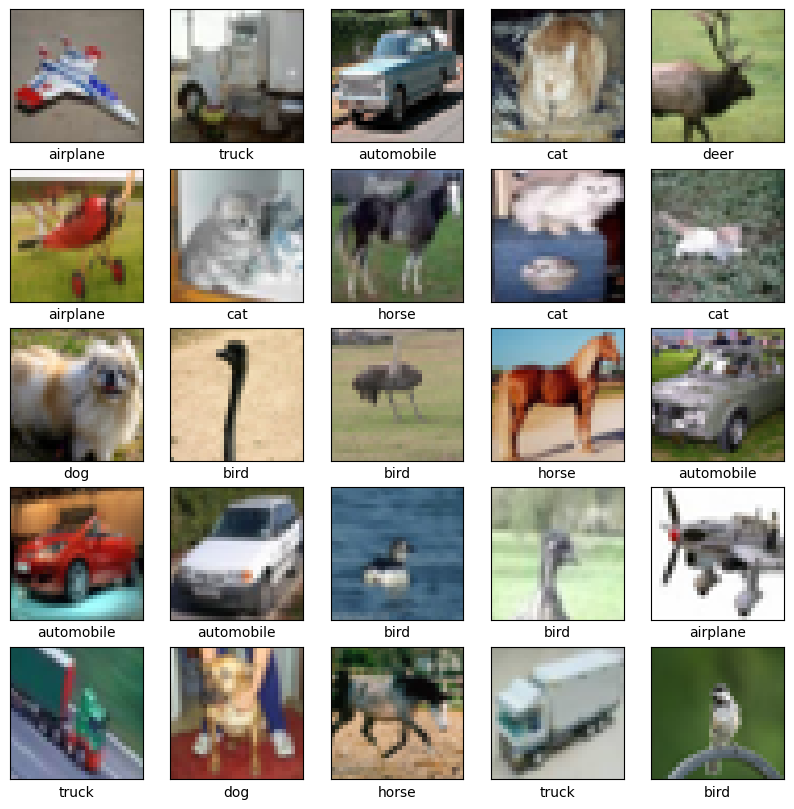

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(30,55):
    plt.subplot(5,5,i+1-30)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Estructura de la CNN
Aquí se crea la estructura de la parte de **convolución** de la red, se definen las capas que utilizará. Comúnmente se van colocando de forma secuencial capas Conv2D y MaxPooling2D.


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

Mostrando el resumen de la red hasta ahora:

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)         0

### Parte final de la CNN
Una vez que se define la parte convolucional, se agregan algunas capas totalmente conectadas para procesar y clasificar las imágenes.
Como la salida de las capas de convolución es en 3D (e.g. la salida de la última capa Conv2D es de (4,4,64)) primero se debe "aplanar" para poder ingresarla como datos en 1D a las capas densas. Al final se agregan 10 neuronas en la capa de salida, ya que CIFAR tiene 10 clases diferentes.

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Y la arquitectura completa queda como sigue:

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)         0

### Juntando y entrenando el modelo

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=25, 
                    validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 [==============================] - 22s 6ms/step - loss: 1.6278 - accuracy: 0.4013 - val_loss: 1.4121 - val_accuracy: 0.4919
Epoch 2/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3061 - accuracy: 0.5308 - val_loss: 1.2830 - val_accuracy: 0.5486
Epoch 3/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2016 - accuracy: 0.5742 - val_loss: 1.2729 - val_accuracy: 0.5522
Epoch 4/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1186 - accuracy: 0.6062 - val_loss: 1.1069 - val_accuracy: 0.6077
Epoch 5/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0559 - accuracy: 0.6286 - val_loss: 1.1334 - val_accuracy: 0.6004
Epoch 6/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0113 - accuracy: 0.6465 - val_loss: 1.0220 - val_accuracy: 0.6464
Epoch 7/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9760 - accuracy: 0.6604 - val_loss: 1.0696 - val_accura

### Evaluar el modelo

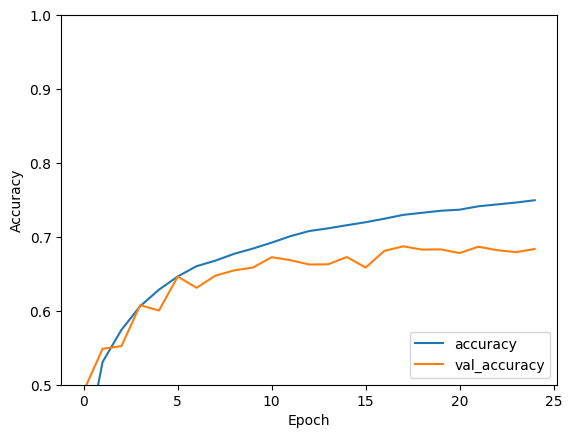

1563/1563 - 3s - loss: 0.6765 - accuracy: 0.7620 - 3s/epoch - 2ms/step
313/313 - 1s - loss: 0.9445 - accuracy: 0.6837 - 657ms/epoch - 2ms/step
Accuracy en el entrenamiento: 0.7619600296020508
Accuracy en el set de prueba: 0.6837000250816345


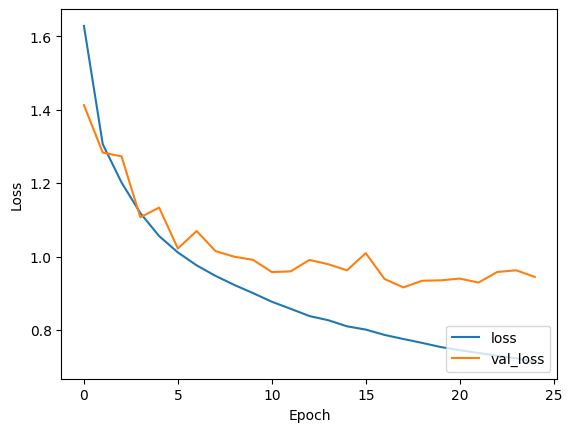

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0.0, 1])
plt.legend(loc='lower right')

train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Accuracy en el entrenamiento:',train_acc)
print('Accuracy en el set de prueba:',test_acc)